# Advanced Regression Assignment

## Data Understanding

In [1]:
# Import the libraries 
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
#load the data in to data frames
train_df = pd.read_csv('train.csv', encoding='ISO-8859-1')
test_df = pd.read_csv('test.csv', encoding='ISO-8859-1')

In [58]:
# Glance at the data frame 
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [59]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Data Understanding using EDA
#### Univariate Analysis

<AxesSubplot:ylabel='SalePrice'>

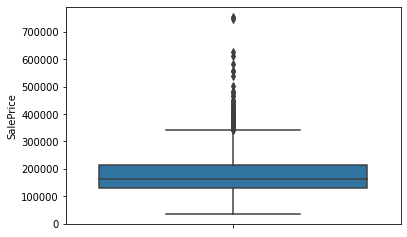

In [60]:
# Let us check the Sale Prices using Box plot
sns.boxplot(y=train_df['SalePrice'])

In [61]:
# Let us check the Sale Prices using mean, std, min, max and quartiles
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [62]:
# We can see outlier Sale Prices beyond 350,000
train_df[(train_df['SalePrice'] > 350000)]['SalePrice']

53      385000
58      438780
112     383970
151     372402
161     412500
178     501837
185     475000
224     386250
231     403000
278     415298
309     360000
313     375000
321     354000
336     377426
349     437154
378     394432
389     426000
440     555000
473     440000
477     380000
481     374000
496     430000
515     402861
527     446261
585     369900
591     451950
608     359100
644     370878
661     402000
664     423000
678     372500
688     392000
691     755000
702     361919
769     538000
774     395000
798     485000
803     582933
825     385000
898     611657
987     395192
1046    556581
1142    424870
1169    625000
1181    392500
1182    745000
1228    367294
1243    465000
1267    378500
1268    381000
1353    410000
1373    466500
1388    377500
1437    394617
Name: SalePrice, dtype: int64

#### We have about 50 records with sale price above 350000 as outliers.

In [63]:
train_df.columns[0:20]

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt'],
      dtype='object')

<AxesSubplot:title={'center':'PavedDrive'}>

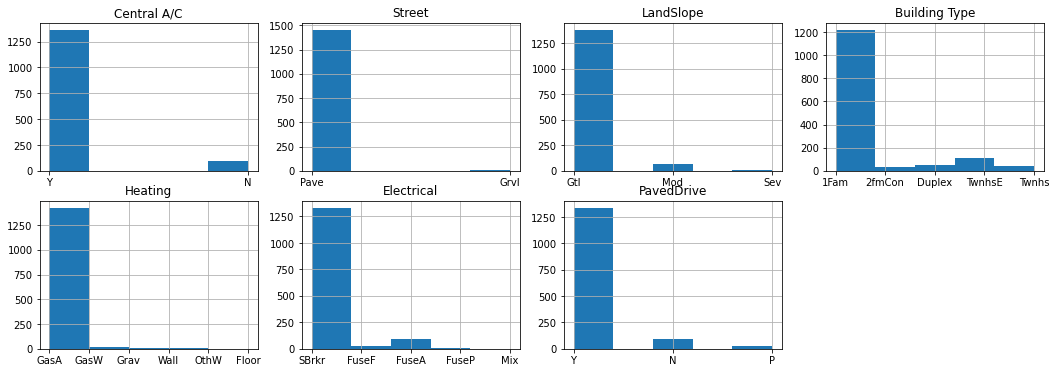

In [64]:
fig = plt.figure(figsize=(18, 6))
plt.subplot(2,4,1)
plt.title('Central A/C')
train_df['CentralAir'].hist(bins=5)
plt.subplot(2,4,2)
plt.title('Street')
train_df['Street'].hist(bins=5)

plt.subplot(2,4,3)
plt.title('LandSlope')
train_df['LandSlope'].hist(bins=5)

plt.subplot(2,4,4)
plt.title('Building Type')
train_df['BldgType'].hist(bins=5)

plt.subplot(2,4,5)
plt.title('Heating')
train_df['Heating'].hist(bins=5)
plt.subplot(2,4,6)
plt.title('Electrical')
train_df['Electrical'].hist(bins=5)
plt.subplot(2,4,7)
plt.title('PavedDrive')
train_df['PavedDrive'].hist(bins=5)

##### We can see that majority of the houses are with below characteristics or properties:
1. More houses with Central Air Conditioning 
2. Type of Road access to property - Paved
3. Land Slope - Gentle
4. Building Type - 1Fam (Single Family - Detached)
5. Heating Type - GasA (Gas forced warm air furnace)
6. Electrical System - Standard Circuit Breakers & Romex
7. Paved Drive - Yes

### Bivariate Analysis
- As our target is to find the variables which are significant in predicting the price of a house.
- We will perform Bivariate analysis of all other variables against Price.
- As we have plenty of features, let us do pair plots in multiple batches for clear visibility

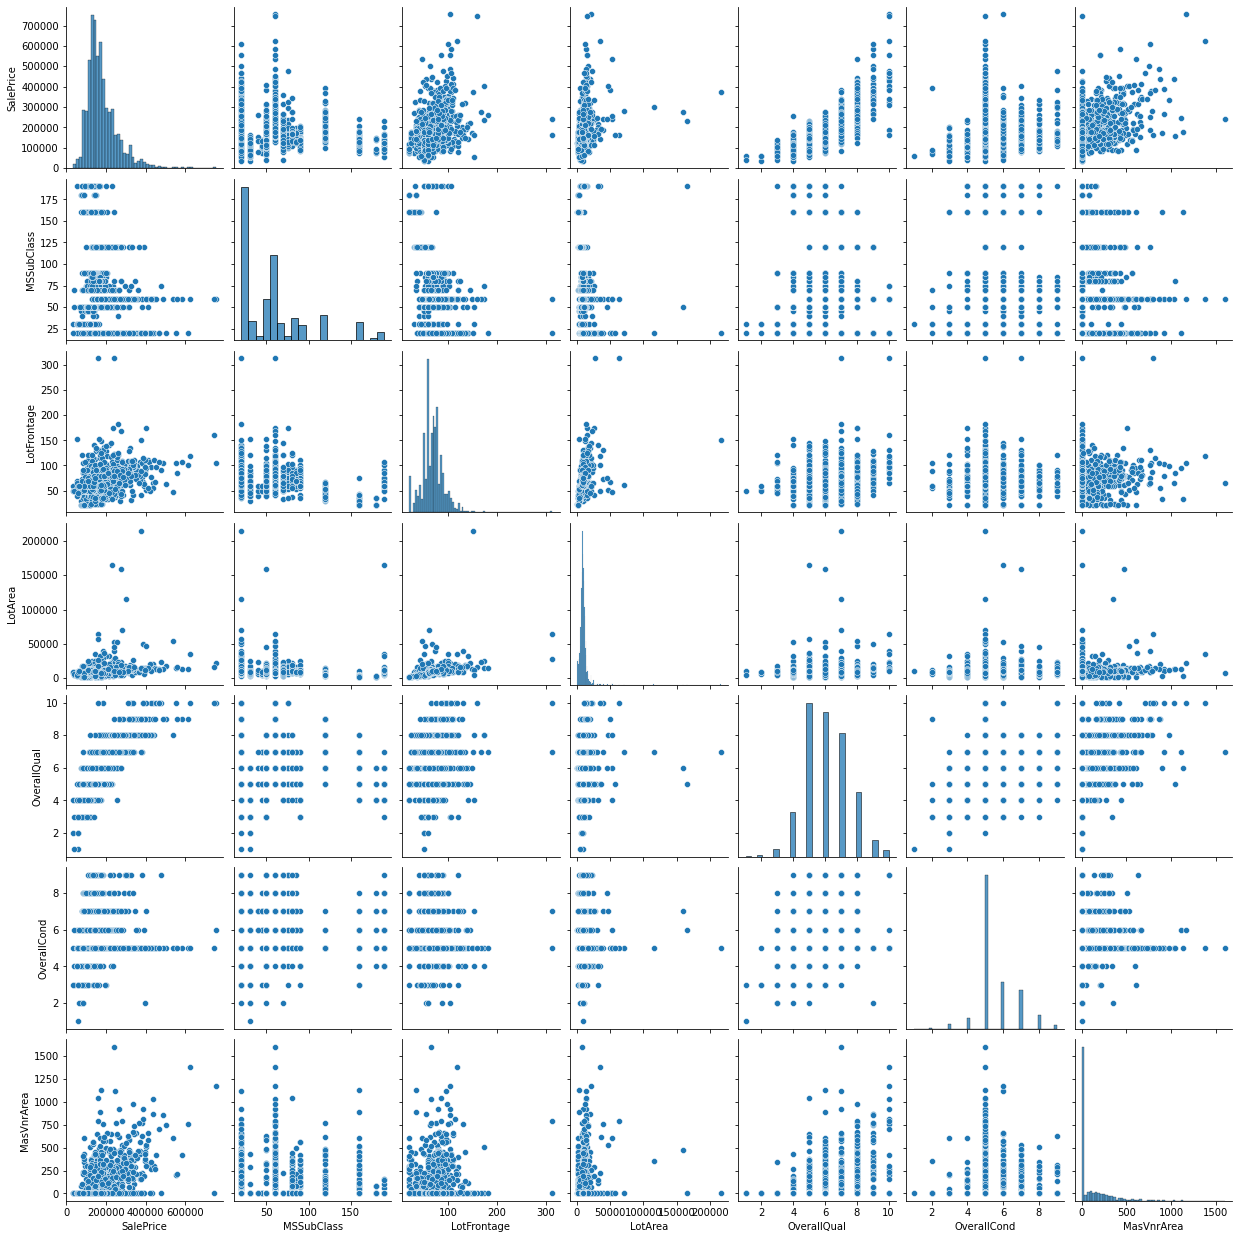

In [65]:
##### Pairplot 1
pp1 = train_df[['SalePrice','MSSubClass',  'LotFrontage', 'LotArea', 'OverallQual',
                   'OverallCond', 'MasVnrArea']]

sns.pairplot(pp1)

##### From the above pair plot we can see that SalePrice positively correlated with 
 'LotFrontage', 'LotArea', 'OverallQual','OverallCond', 'MasVnrArea'

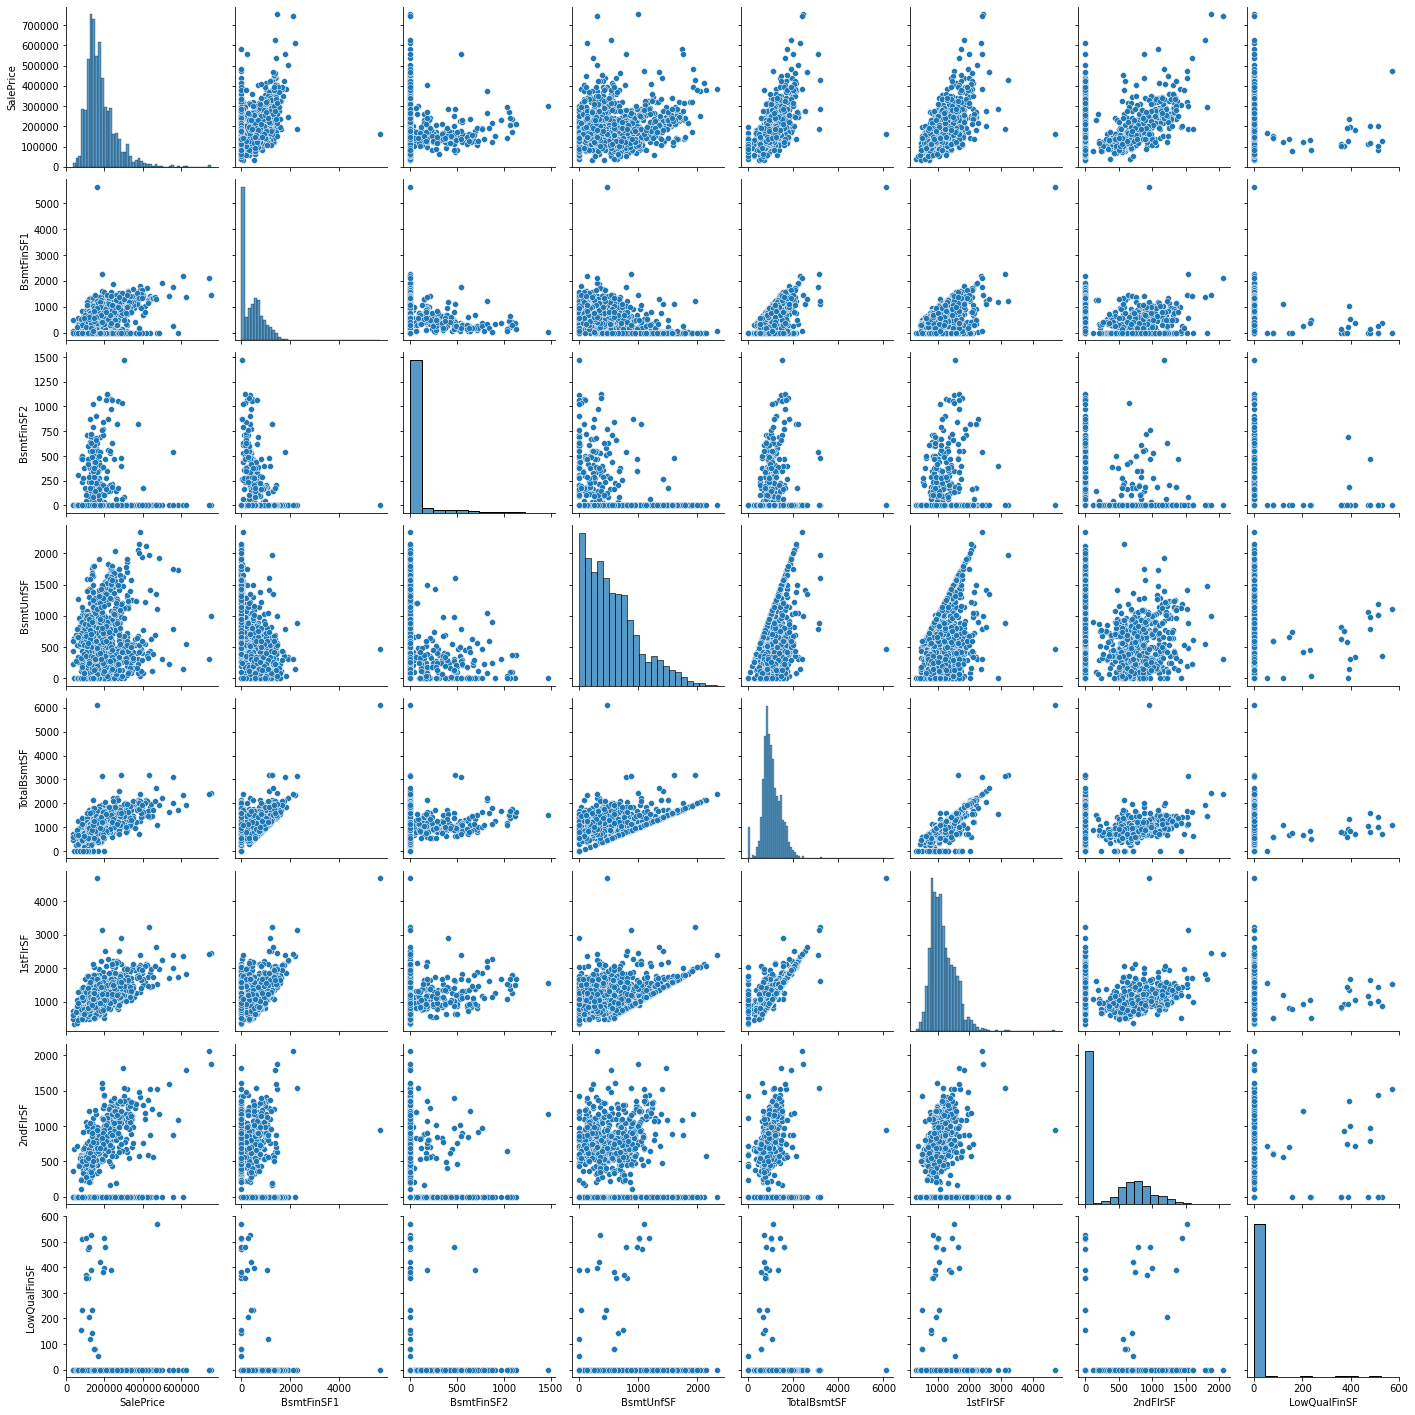

In [66]:
##### Pairplot 2
pp2 = train_df[['SalePrice', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'LowQualFinSF']]

sns.pairplot(pp2)

#### From the above pair plot we can see that SalePrice positively correlated with
'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlourSF', '2ndFlourSF'

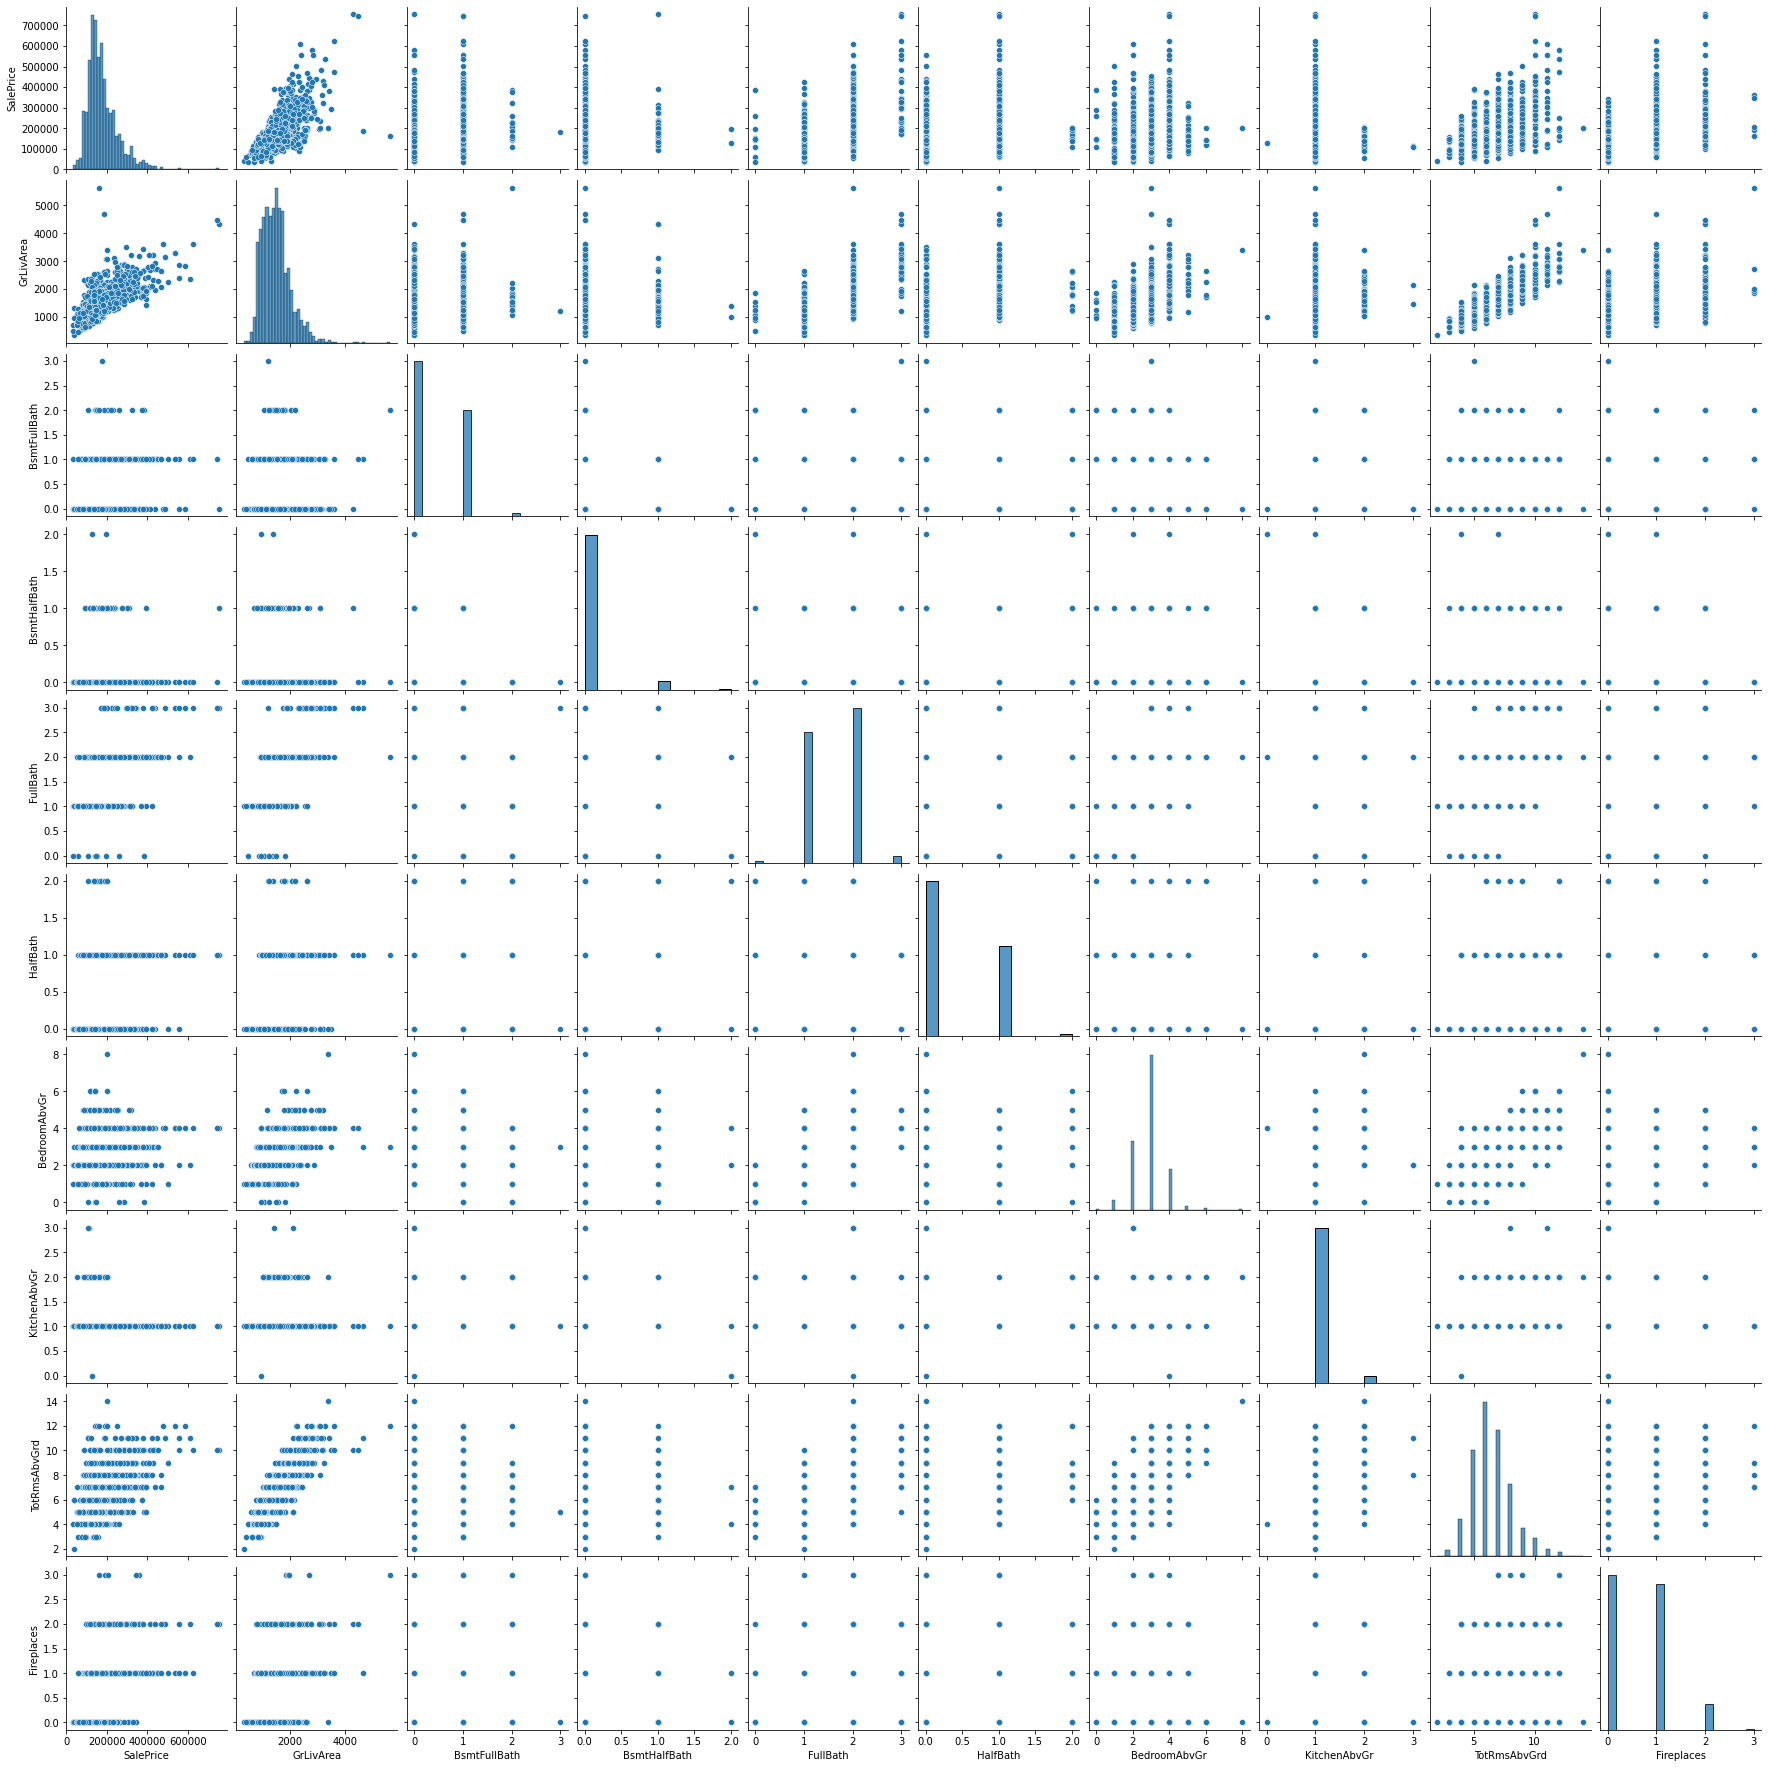

In [67]:
##### Pairplot 3
pp3 = train_df[['SalePrice', 'GrLivArea' , 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
              'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces']]

sns.pairplot(pp3)

#### From the above pair plot we can see that SalePrice positively correlated with
'GrLivArea', 'TotalRoomsAboveGrade'

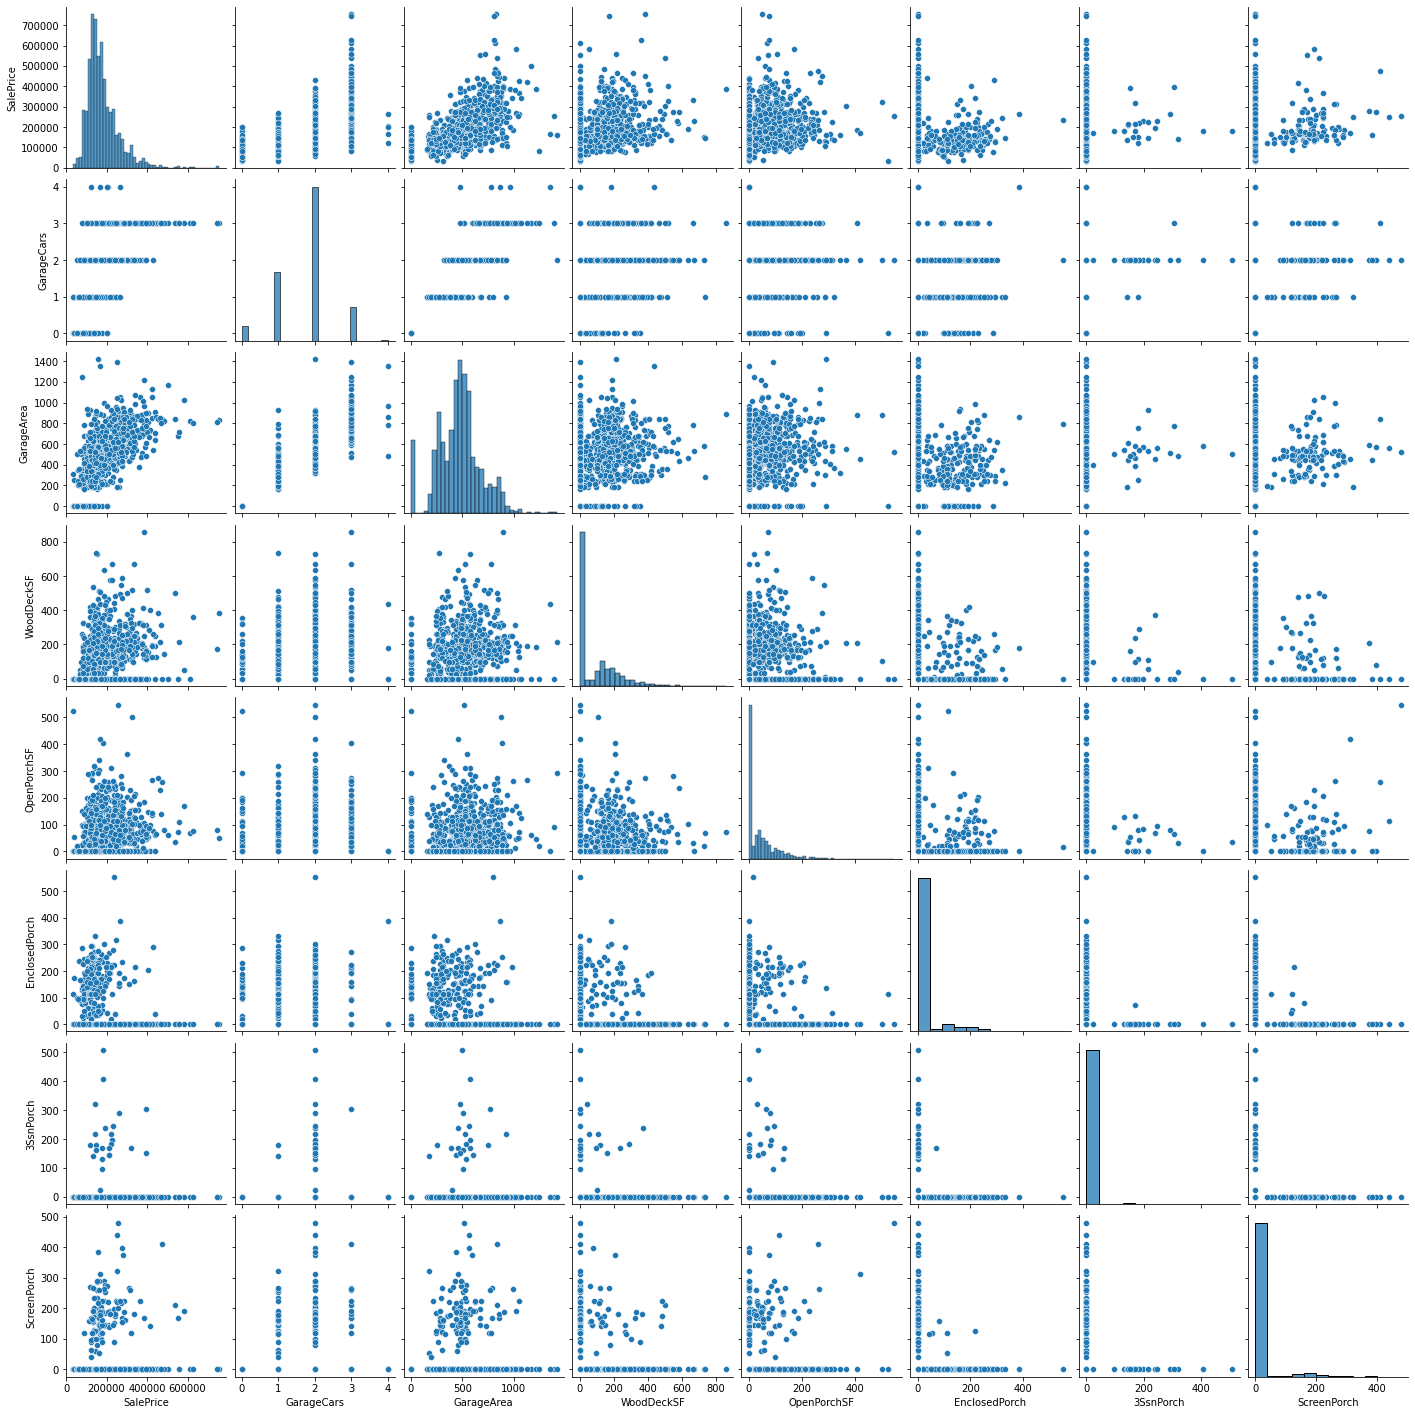

In [68]:
##### Pairplot 4
pp4 = train_df[['SalePrice', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']]

sns.pairplot(pp4)

#### From the above pair plot we can see that SalePrice mostly positively correlated with
'GarageArea', 'WoodDeckSF', 'OpenPorchSF'

#### Add derived columns
1. TotalSF = 1stFlourSF + 2ndFlourSF

In [69]:
train_df['TotalSF'] = train_df['1stFlrSF'] + train_df['2ndFlrSF']
test_df['TotalSF'] = test_df['1stFlrSF'] + test_df['2ndFlrSF']

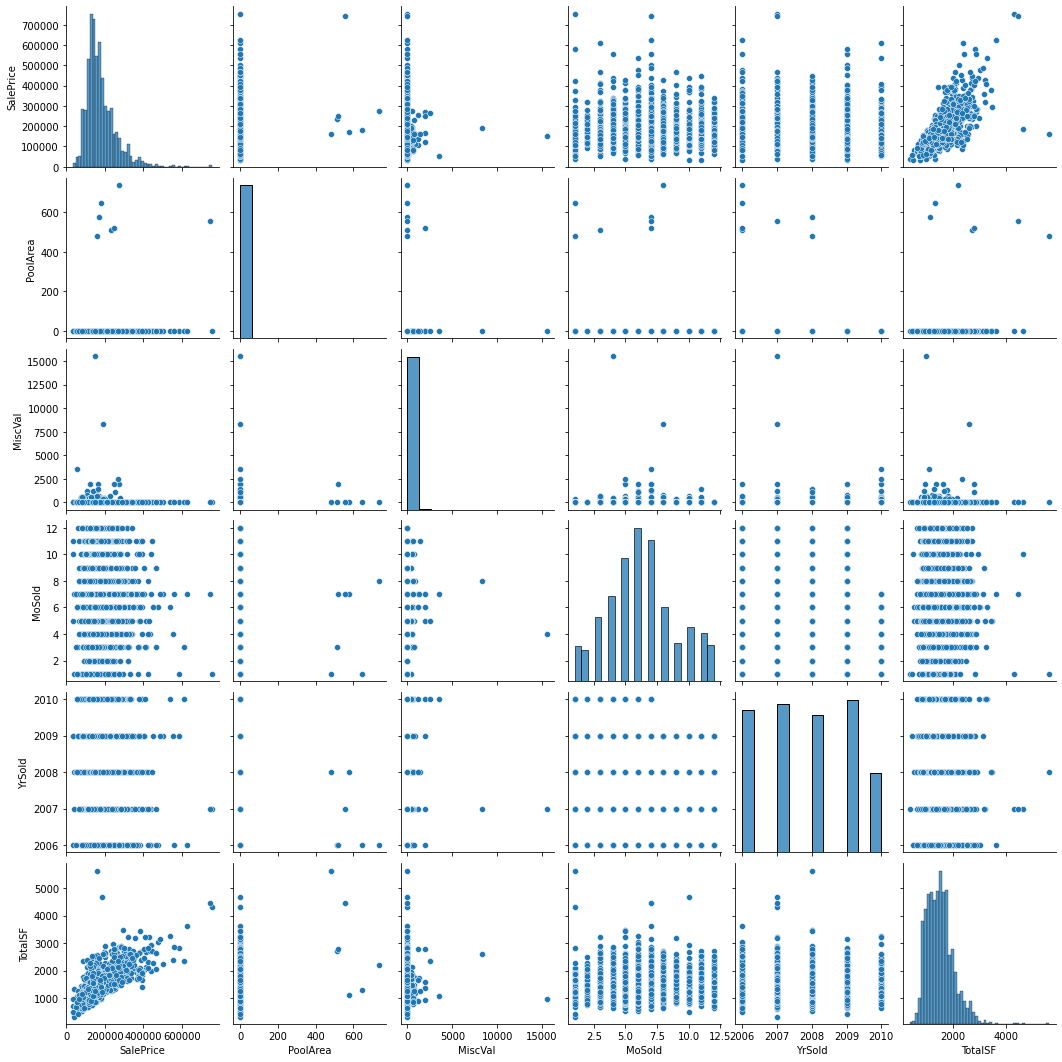

In [70]:
##### Pairplot 5
pp5 = train_df[['SalePrice', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'TotalSF']]

sns.pairplot(pp5)

#### From the above pair plot we can see that SalePrice mostly positively correlated with¶
'TotalSF'

#### Let us look at more detailed bar plots for Bivariate analysis

<AxesSubplot:title={'center':'LandSlope'}, xlabel='LandSlope', ylabel='SalePrice'>

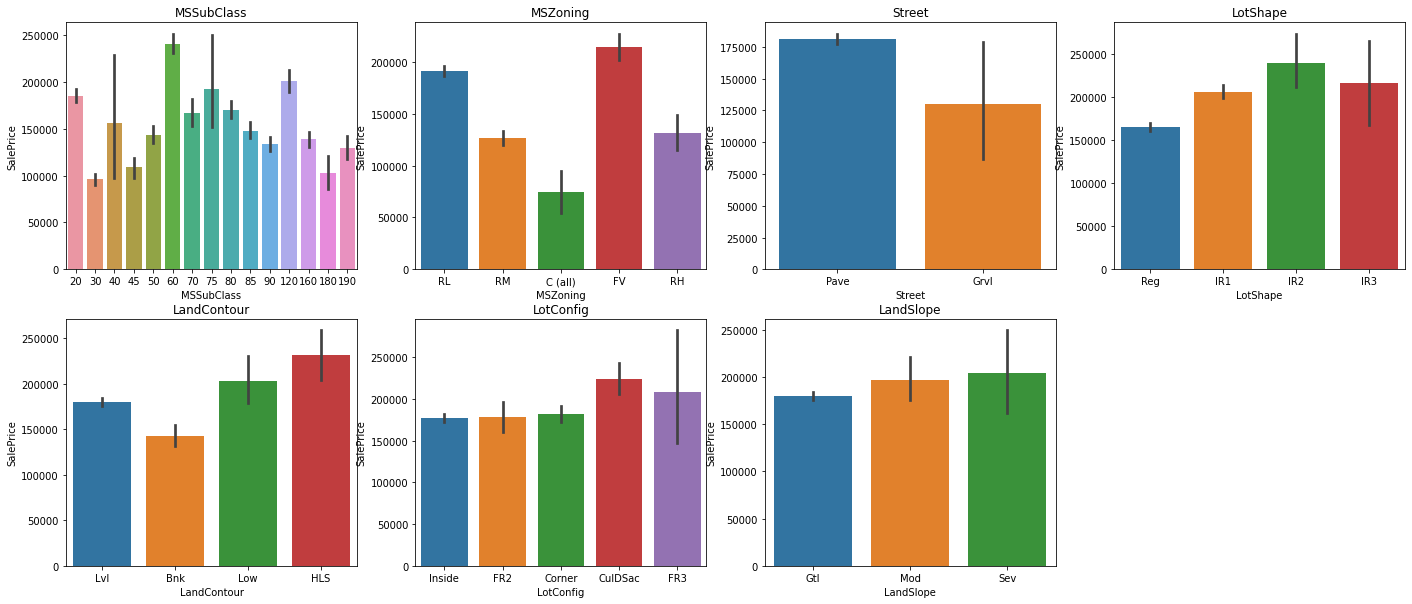

In [71]:
fig = plt.figure(figsize=(24, 10))
plt.subplot(2,4,1)
plt.title('MSSubClass')
sns.barplot(y=train_df['SalePrice'], x=train_df['MSSubClass'])
plt.subplot(2,4,2)
plt.title('MSZoning')
sns.barplot(y=train_df['SalePrice'], x=train_df['MSZoning'])
plt.subplot(2,4,3)
plt.title('Street')
sns.barplot(y=train_df['SalePrice'], x=train_df['Street'])
plt.subplot(2,4,4)
plt.title('LotShape')
sns.barplot(y=train_df['SalePrice'], x=train_df['LotShape'])
plt.subplot(2,4,5)
plt.title('LandContour')
sns.barplot(y=train_df['SalePrice'], x=train_df['LandContour'])
plt.subplot(2,4,6)
plt.title('LotConfig')
sns.barplot(y=train_df['SalePrice'], x=train_df['LotConfig'])
plt.subplot(2,4,7)
plt.title('LandSlope')
sns.barplot(y=train_df['SalePrice'], x=train_df['LandSlope'])

#### From the above plots we can see that average SalePrice is higher for:
1. MSSubClass of 60 (2-STORY 1946 & NEWER)
2. MSZoning of RL and FV (Residential Low Density and Floating Village Residential)
3. Street of Paved (Paved type of road access to property)
4. LandContour of HLS (Hillside)
5. LotConfig of Cul-de-sac

<AxesSubplot:title={'center':'Electrical'}, xlabel='Electrical', ylabel='SalePrice'>

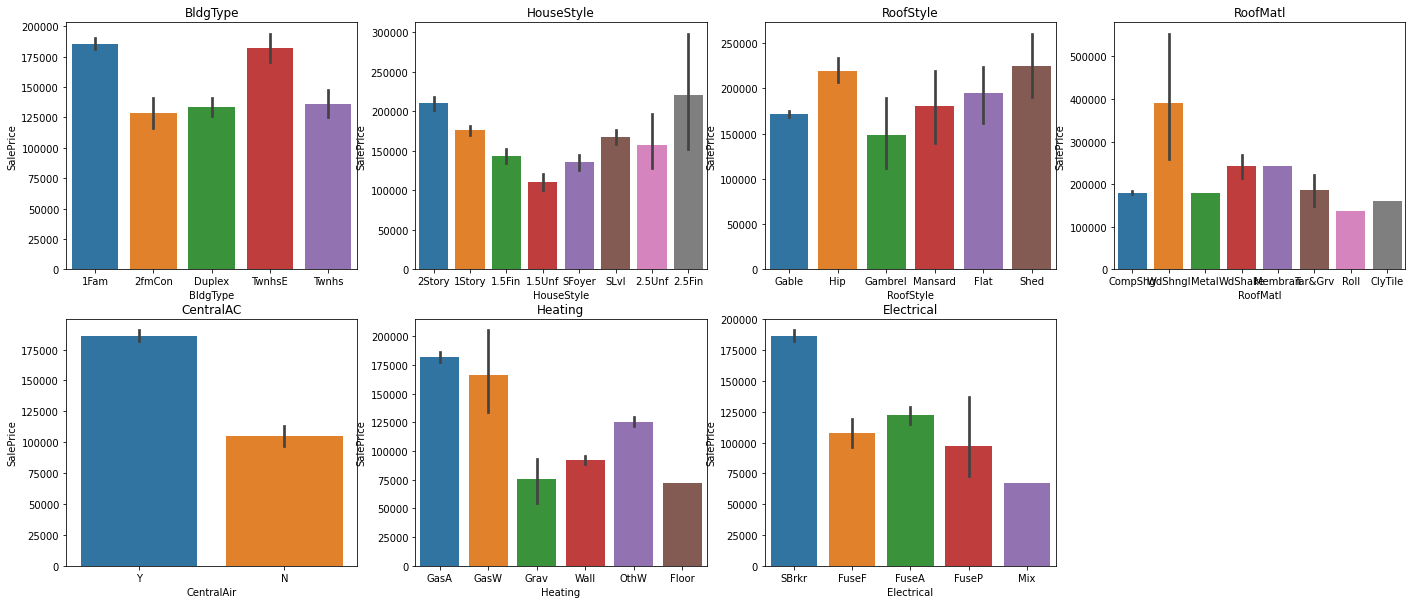

In [72]:
fig = plt.figure(figsize=(24, 10))
plt.subplot(2,4,1)
plt.title('BldgType')
sns.barplot(y=train_df['SalePrice'], x=train_df['BldgType'])
plt.subplot(2,4,2)
plt.title('HouseStyle')
sns.barplot(y=train_df['SalePrice'], x=train_df['HouseStyle'])
plt.subplot(2,4,3)
plt.title('RoofStyle')
sns.barplot(y=train_df['SalePrice'], x=train_df['RoofStyle'])
plt.subplot(2,4,4)
plt.title('RoofMatl')
sns.barplot(y=train_df['SalePrice'], x=train_df['RoofMatl'])
plt.subplot(2,4,5)
plt.title('CentralAC')
sns.barplot(y=train_df['SalePrice'], x=train_df['CentralAir'])
plt.subplot(2,4,6)
plt.title('Heating')
sns.barplot(y=train_df['SalePrice'], x=train_df['Heating'])
plt.subplot(2,4,7)
plt.title('Electrical')
sns.barplot(y=train_df['SalePrice'], x=train_df['Electrical'])

#### From the above plots we can see that average SalePrice is higher for:
1. BldgType of 1Fam and TwnhsE (Single-family Detached and Townhouse End Unit)
2. Housetyle of 2Story and 2.5Fin (Two story, and Two and one-half story: 2nd level finished)
3. RoofStyle of Hip and Flat
4. RoofMatl of Standard (Composite) Shingle
5. Centralized Air Conditioning
6. Heating of GasA and GasW (Gas forced warm air furnace and Gas hot water or steam heat)
7. Electrical system of Standard Circuit Breakers & Romex

<AxesSubplot:title={'center':'HeatingQC'}, xlabel='HeatingQC', ylabel='SalePrice'>

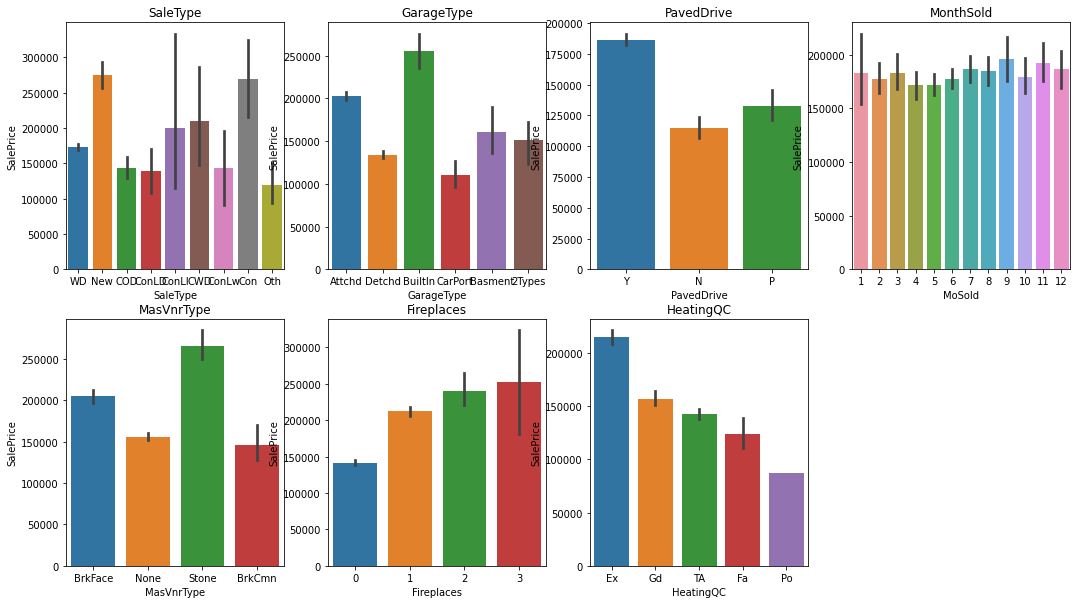

In [73]:
fig = plt.figure(figsize=(18, 10))
plt.subplot(2,4,1)
plt.title('SaleType')
sns.barplot(y=train_df['SalePrice'], x=train_df['SaleType'])
plt.subplot(2,4,2)
plt.title('GarageType')
sns.barplot(y=train_df['SalePrice'], x=train_df['GarageType'])
plt.subplot(2,4,3)
plt.title('PavedDrive')
sns.barplot(y=train_df['SalePrice'], x=train_df['PavedDrive'])
plt.subplot(2,4,4)
plt.title('MonthSold')
sns.barplot(y=train_df['SalePrice'], x=train_df['MoSold'])
plt.subplot(2,4,5)
plt.title('MasVnrType')
sns.barplot(y=train_df['SalePrice'], x=train_df['MasVnrType'])
plt.subplot(2,4,6)
plt.title('Fireplaces')
sns.barplot(y=train_df['SalePrice'], x=train_df['Fireplaces'])
plt.subplot(2,4,7)
plt.title('HeatingQC')
sns.barplot(y=train_df['SalePrice'], x=train_df['HeatingQC'])

#### From the above plots we can see that average SalePrice is higher for:
1. GarageType of Builtin
2. Paved Drive - Yes
3. Masonry Veneer Type - Stone
4. HeatingQuality - Excellent

--- We can also see that average SalePrice does not change by the month of sale.

--- Saleprice increases with the number of fireplaces

<AxesSubplot:title={'center':'HalfBath'}, xlabel='HalfBath', ylabel='SalePrice'>

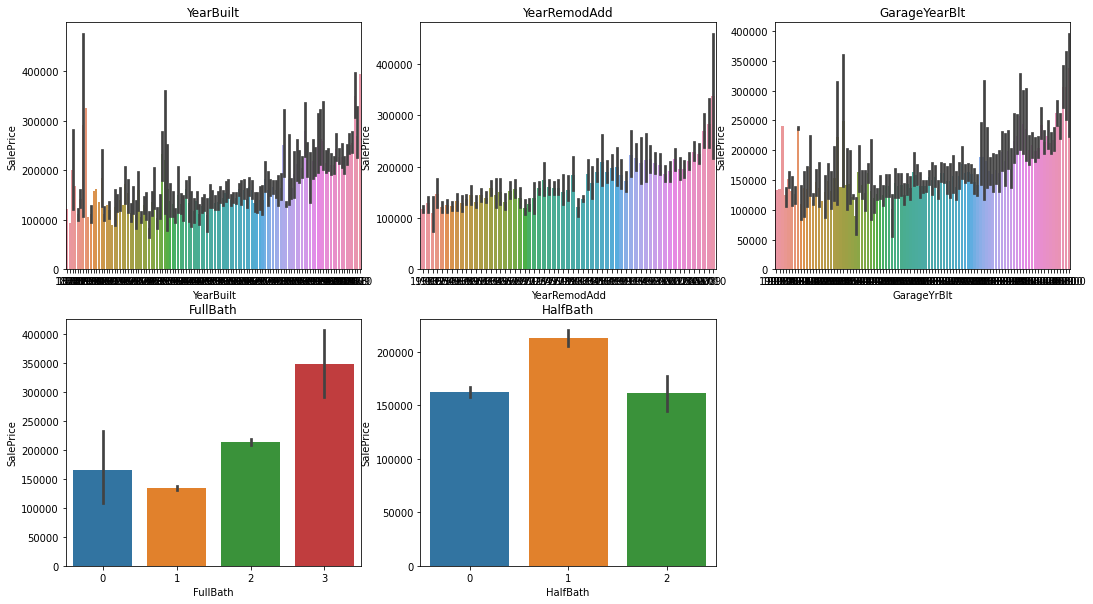

In [74]:
fig = plt.figure(figsize=(18, 10))
plt.subplot(2,3,1)
plt.title('YearBuilt')
sns.barplot(y=train_df['SalePrice'], x=train_df['YearBuilt'])
plt.subplot(2,3,2)
plt.title('YearRemodAdd')
sns.barplot(y=train_df['SalePrice'], x=train_df['YearRemodAdd'])
plt.subplot(2,3,3)
plt.title('GarageYearBlt')
sns.barplot(y=train_df['SalePrice'], x=train_df['GarageYrBlt'])
plt.subplot(2,3,4)
plt.title('FullBath')
sns.barplot(y=train_df['SalePrice'], x=train_df['FullBath'])
plt.subplot(2,3,5)
plt.title('HalfBath')
sns.barplot(y=train_df['SalePrice'], x=train_df['HalfBath'])

#### From the above plots we can see that average SalePrice is higher for:
- SalePrice increases by year built, year remodeled/refurbished  and year garages built.
    Older the house, lower the price.
- Saleprice increases with the number of FullBath's

#### Let us see the correlation between multiple features using heat map

(18.0, 0.1)

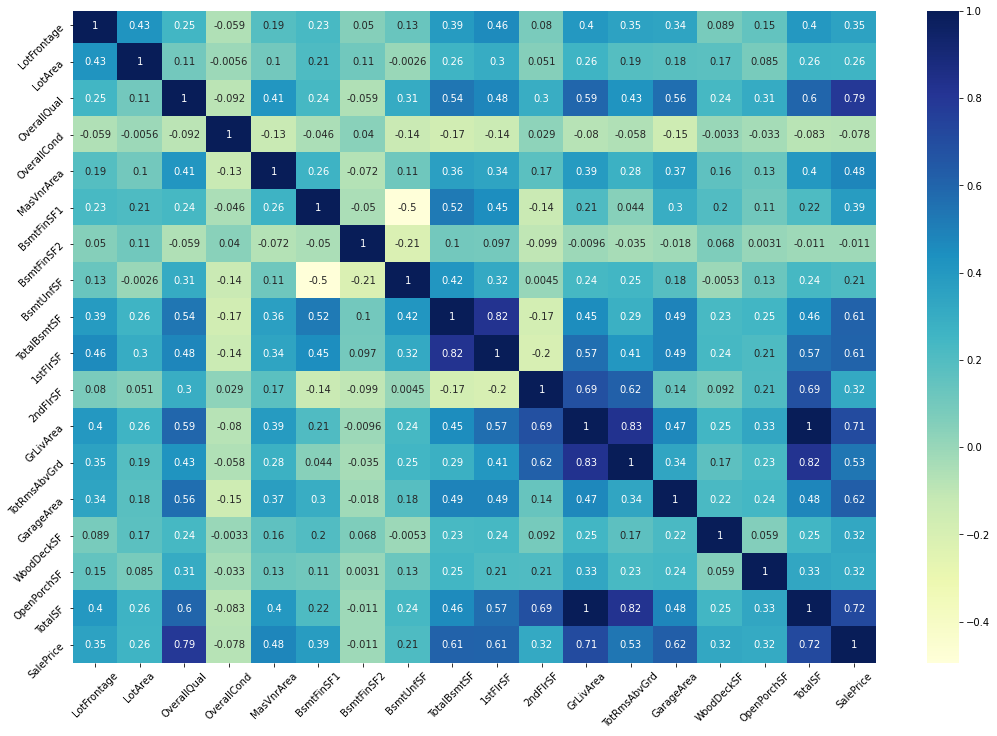

In [75]:
df_corr = train_df[['LotFrontage', 'LotArea', 'OverallQual','OverallCond', 'MasVnrArea',
                       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF',
                       'GrLivArea', 'TotRmsAbvGrd','GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                       'TotalSF', 'SalePrice']]
plt.figure(figsize=(18,12))
ax = plt.subplot(1,1,1)
sns.heatmap(df_corr.corr(), annot=True, cmap='YlGnBu')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
ax.set_ylim(18, 0.1)

#### From the heat map, we can see SalePrice is highly positively correlated with below variables in that order:
1. Overall Quality
2. Total SFT, GrLivArea (Living Area SFT)
3. Garage Area, First Floor SFT, Total Basement SFT
4. Total Rooms above grade.

### Data Cleaning and Preparation
- by treating null or nan values, encoding categorical features

In [76]:
# Check the ratio of nulls in the columns
print(round(100*(train_df.isnull().sum()/len(train_df.index))).sort_values())

Id                0.0
BedroomAbvGr      0.0
HalfBath          0.0
FullBath          0.0
BsmtHalfBath      0.0
                ...  
FireplaceQu      47.0
Fence            81.0
Alley            94.0
MiscFeature      96.0
PoolQC          100.0
Length: 82, dtype: float64


In [77]:
# drop the columns with 80% missing values, as these do not add any value or information
train_df = train_df.drop('Fence', axis=1)
train_df = train_df.drop('Alley', axis=1)
train_df = train_df.drop('MiscFeature', axis=1)
train_df = train_df.drop('PoolQC', axis=1)

test_df = test_df.drop('Fence', axis=1)
test_df = test_df.drop('Alley', axis=1)
test_df = test_df.drop('MiscFeature', axis=1)
test_df = test_df.drop('PoolQC', axis=1)

In [78]:
# missing values in train data frame
print(round(100*(train_df.isnull().sum()/len(train_df.index))).sort_values())

Id               0.0
KitchenAbvGr     0.0
BedroomAbvGr     0.0
HalfBath         0.0
FullBath         0.0
                ... 
GarageYrBlt      6.0
GarageType       6.0
GarageCond       6.0
LotFrontage     18.0
FireplaceQu     47.0
Length: 78, dtype: float64


In [79]:
# missing values in test data frame
print(round(100*(test_df.isnull().sum()/len(test_df.index))).sort_values())

Id               0.0
BedroomAbvGr     0.0
HalfBath         0.0
FullBath         0.0
BsmtHalfBath     0.0
                ... 
GarageCond       5.0
GarageType       5.0
GarageFinish     5.0
LotFrontage     16.0
FireplaceQu     50.0
Length: 77, dtype: float64


In [80]:
# Impute missing values of LotFrontage with median value
lf_median = train_df['LotFrontage'].median()
train_df = train_df.fillna({'LotFrontage':lf_median})
test_df = test_df.fillna({'LotFrontage':lf_median})

In [81]:
# Encode FireplaceQu values and Impute missing values with additional code representing Unknown value. 
def get_fpq(fpq):
    group = ''
    if fpq == 'TA':
        group = 0  
    elif fpq == 'Gd':
        group = 1  
    elif fpq == 'Fa':
        group = 2  
    elif fpq == 'Ex':
        group = 3  
    elif fpq == 'Po':
        group = 4
    else:
        group = 5  # Unknown
    return group
train_df['FireplaceQu'] = train_df['FireplaceQu'].apply(lambda x:get_fpq(x))
test_df['FireplaceQu'] = test_df['FireplaceQu'].apply(lambda x:get_fpq(x))

In [82]:
# Impute missing values of GarageYrBlt with median value
gyb_median = train_df['GarageYrBlt'].median()
train_df = train_df.fillna({'GarageYrBlt':gyb_median})
test_df = test_df.fillna({'GarageYrBlt':gyb_median})

In [83]:
# Encode GarageQual values and Impute missing values with additional code representing Unknown value. 
def get_gq(gq):
    group = ''
    if gq == 'TA':
        group = 0  
    elif gq == 'Gd':
        group = 1  
    elif gq == 'Fa':
        group = 2  
    elif gq == 'Ex':
        group = 3  
    elif gq == 'Po':
        group = 4
    else:
        group = 5  # Unknown
    return group
train_df['GarageQual'] = train_df['GarageQual'].apply(lambda x:get_gq(x))
test_df['GarageQual'] = test_df['GarageQual'].apply(lambda x:get_gq(x))

In [84]:
# Encode GarageCond values and Impute missing values with additional code representing Unknown value. 
def get_gc(gc):
    group = ''
    if gc == 'TA':
        group = 0  
    elif gc == 'Gd':
        group = 1  
    elif gc == 'Fa':
        group = 2  
    elif gc == 'Ex':
        group = 3  
    elif gc == 'Po':
        group = 4
    else:
        group = 5  # Unknown
    return group
train_df['GarageCond'] = train_df['GarageCond'].apply(lambda x:get_gc(x))
test_df['GarageCond'] = test_df['GarageCond'].apply(lambda x:get_gc(x))

In [85]:
# Encode GarageFinish values and Impute missing values with additional code representing Unknown value. 
def get_gf(gf):
    group = ''
    if gf == 'RFn':
        group = 0  
    elif gf == 'Unf':
        group = 1  
    elif gf == 'Fin':
        group = 2  
    else:
        group = 3  # Unknown
    return group
train_df['GarageFinish'] = train_df['GarageFinish'].apply(lambda x:get_gf(x))
test_df['GarageFinish'] = test_df['GarageFinish'].apply(lambda x:get_gf(x))

In [86]:
# Encode GarageType values and Impute missing values with additional code representing Unknown value. 
def get_gt(gt):
    group = ''
    if gt == 'Attchd':
        group = 0  
    elif gt == 'Detchd':
        group = 1  
    elif gt == 'BuiltIn':
        group = 2  
    elif gt == 'CarPort':
        group = 3  
    elif gt == 'Basment':
        group = 4
    elif gt == '2Types':
        group = 5
    else:
        group = 6  # Unknown
    return group
train_df['GarageType'] = train_df['GarageType'].apply(lambda x:get_gt(x))
test_df['GarageType'] = test_df['GarageType'].apply(lambda x:get_gt(x))

In [87]:
# Encode BsmtFinType columns and Impute missing values with additional code representing Unknown value. 
def get_bft(bft):
    group = ''
    if bft == 'Unf':
        group = 0  
    elif bft == 'BLQ':
        group = 1  
    elif bft == 'ALQ':
        group = 2  
    elif bft == 'Rec':
        group = 3  
    elif bft == 'LwQ':
        group = 4
    elif bft == 'GLQ':
        group = 5
    else:
        group = 6  # Unknown
    return group
train_df['BsmtFinType1'] = train_df['BsmtFinType1'].apply(lambda x:get_bft(x))
test_df['BsmtFinType1'] = test_df['BsmtFinType1'].apply(lambda x:get_bft(x))
train_df['BsmtFinType2'] = train_df['BsmtFinType2'].apply(lambda x:get_bft(x))
test_df['BsmtFinType2'] = test_df['BsmtFinType2'].apply(lambda x:get_bft(x))

In [88]:
# Encode BsmtCond and BsmtQual field values and Impute missing values with additional code representing Unknown value. 
def get_bcq(bcq):
    group = ''
    if bcq == 'TA':
        group = 0  
    elif bcq == 'Gd':
        group = 1  
    elif bcq == 'Fa':
        group = 2  
    elif bcq == 'Po':
        group = 3  
    elif bcq == 'Ex':
        group = 4
    else:
        group = 5  # Unknown
    return group
train_df['BsmtCond'] = train_df['BsmtCond'].apply(lambda x:get_bcq(x))
test_df['BsmtCond'] = test_df['BsmtCond'].apply(lambda x:get_bcq(x))
train_df['BsmtQual'] = train_df['BsmtQual'].apply(lambda x:get_bcq(x))
test_df['BsmtQual'] = test_df['BsmtQual'].apply(lambda x:get_bcq(x))

In [89]:
# Encode BsmtExposure values and Impute missing values with additional code representing Unknown value. 
def get_be(be):
    group = ''
    if be == 'No':
        group = 0  
    elif be == 'Gd':
        group = 1  
    elif be == 'Mn':
        group = 2  
    elif be == 'Av':
        group = 3  
    else:
        group = 4  # Unknown
    return group
train_df['BsmtExposure'] = train_df['BsmtExposure'].apply(lambda x:get_be(x))
test_df['BsmtExposure'] = test_df['BsmtExposure'].apply(lambda x:get_be(x))

In [90]:
# Encode MasVnrType values and Impute missing values with additional code representing Unknown value. 
def get_vt(vt):
    group = ''
    if vt == 'BrkFace':
        group = 0  
    elif vt == 'None':
        group = 1  
    elif vt == 'Stone':
        group = 2  
    elif vt == 'BrkCmn':
        group = 3  
    else:
        group = 4  # Unknown
    return group
train_df['MasVnrType'] = train_df['MasVnrType'].apply(lambda x:get_vt(x))
test_df['MasVnrType'] = test_df['MasVnrType'].apply(lambda x:get_vt(x))

In [91]:
train_df = train_df.fillna({'MasVnrArea':0})
test_df = test_df.fillna({'MasVnrArea':0})

#### Now we do not have missing values for any columns

In [92]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalSF
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,0.819863,103.117123,...,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,1509.619178
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,0.671369,180.731373,...,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,521.163523
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,334.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,1123.750000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,1.000000,0.000000,...,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,1458.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,1.000000,164.250000,...,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,1775.250000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,4.000000,1600.000000,...,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,5642.000000


In [93]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [94]:
# As we have added a derived column TotalSF adding 1stFlrSF and 2ndFlrSF, let us drop those columns
train_df = train_df.drop(['1stFlrSF','2ndFlrSF'], axis=1)
test_df = test_df.drop(['1stFlrSF','2ndFlrSF'], axis=1)

#### Let us add dummy variables and map 1's and 0's for variables with two values.

In [95]:
# List of variables to map - CentralAC, Street
train_df['CentralAir'] = train_df['CentralAir'].map({'Y': 1, 'N': 0})
test_df['CentralAir'] = test_df['CentralAir'].map({'Y': 1, 'N': 0})
train_df['Street'] = train_df['Street'].map({'Pave': 1, 'Grvl': 0})
test_df['Street'] = test_df['Street'].map({'Pave': 1, 'Grvl': 0})

#### Dummy variables

In [96]:
# List of category variables with more than one level
varlist= ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'BldgType', 'HouseStyle', 
          'RoofStyle', 'RoofMatl', 'Heating', 'Electrical', 'SaleType', 'GarageType', 'PavedDrive', 
          'MasVnrType', 'HeatingQC', 'Neighborhood', 'Condition1','Condition2', 'Exterior1st','Exterior2nd',
          'ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
          'BsmtFinType2','KitchenQual','Functional','GarageFinish', 'GarageQual','GarageCond',
          'SaleCondition'] 

for i in varlist:
    # Add dummy variables 
    status = pd.get_dummies(train_df[i], prefix = i, drop_first = True)
    # Add the results to the original housing dataframe
    train_df = pd.concat([train_df, status], axis = 1)
    # Drop the original column
    train_df.drop([i], axis = 1, inplace = True)

    # Add dummy variables 
    status = pd.get_dummies(test_df[i], prefix = i, drop_first = True)
    # Add the results to the original housing dataframe
    test_df = pd.concat([test_df, status], axis = 1)
    # Drop the original column
    test_df.drop([i], axis = 1, inplace = True)

In [97]:
def get_utilities(util):
    group = ''
    if util == 'AllPub':
        group = 0  
    elif util == 'NoSeWa':
        group = 1  
    else:
        group = 2  # Unknown
    return group
train_df['Utilities'] = train_df['Utilities'].apply(lambda x:get_utilities(x))
test_df['Utilities'] = test_df['Utilities'].apply(lambda x:get_utilities(x))

#### Let us split the X and y datasets from train_df, separate Id from train and test data frames

In [98]:
train_Id = train_df['Id']
test_Id = test_df['Id']
train_X = train_df.drop(['SalePrice','Id'], axis=1)
test_X = test_df.drop(['Id'], axis=1)
train_y = train_df['SalePrice'].values.reshape(-1,1)

#### Let us make sure both train and test data frames have same set of columns, and do not have nan or infinite values which will cause problem while making predictions

In [99]:
train_X.columns 

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Utilities',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       ...
       'GarageCond_1', 'GarageCond_2', 'GarageCond_3', 'GarageCond_4',
       'GarageCond_5', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=242)

In [100]:
test_X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Utilities',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       ...
       'GarageCond_1', 'GarageCond_2', 'GarageCond_3', 'GarageCond_4',
       'GarageCond_5', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=227)

In [101]:
train_X = train_X[test_X.columns]

In [103]:
test_X = np.nan_to_num(test_X)
np.isnan(test_X).sum()

0

#### Let us split train data set into train and valid for validation purpose

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_y, test_size=0.10, random_state=42)

## Model Building and Evaluation

### Linear Regression - Least Squares Fitting

In [105]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [106]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
scaler.fit(train_X)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
test_X = scaler.transform(test_X)

In [107]:
lm = LinearRegression()
MSEs = cross_val_score(lm, X_train, y_train,
                      scoring = 'neg_mean_squared_error', cv=5)
mean_MSE = np.mean(MSEs)
print('mean_MSE : ', mean_MSE)

lm.fit(X_train, y_train)
train_pred = lm.predict(X_train)
print('Mean Squared Error : ',np.sqrt(mean_squared_error(y_train, train_pred)))
print('R2 Score : ',r2_score(y_train, train_pred))

mean_MSE :  -1.5291064561360618e+29
Mean Squared Error :  23865.477963503756
R2 Score :  0.9049447107263692


In [108]:
valid_pred = lm.predict(X_valid)
print('Mean Squared Error : ',np.sqrt(mean_squared_error(y_valid, valid_pred)))
print('R2 Score : ',r2_score(y_valid, valid_pred))

Mean Squared Error :  776477361680616.1
R2 Score :  -6.598893096110422e+19


In [109]:
# We can see negative R2 for valid data and hence the predictions are not on horizantal line.
# Let us try advanced regression.
'''
out_df = pd.concat([test_Id, pd.DataFrame(test_pred)], axis=1)
out_df.columns = ['Id','SalePrice']
out_df.to_csv('lg.csv', index=False) # Score 1.86145. Board position 4467  0.89 0.8
'''

"\nout_df = pd.concat([test_Id, pd.DataFrame(test_pred)], axis=1)\nout_df.columns = ['Id','SalePrice']\nout_df.to_csv('lg.csv', index=False) # Score 1.86145. Board position 4467  0.89 0.8\n"

### Ridge Regression

In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [116]:
ridge = Ridge()
parameters = {'alpha': [ 3, 5,7, 8, 9, 10],
             'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
ridge_regressor = GridSearchCV(estimator = ridge, 
                               param_grid = parameters,
                               scoring = 'neg_mean_squared_error', 
                               cv=5,
                               return_train_score=True,
                               verbose = 1)
ridge_regressor.fit(X_train, y_train)

print('Best Parameter : ', ridge_regressor.best_params_)
print('Best score : ', ridge_regressor.best_score_)

train_pred_ridge = ridge_regressor.predict(X_train)
print('Mean Squared Error : ',np.sqrt(mean_squared_error(y_train, train_pred_ridge)))
print('R2 Score : ',r2_score(y_train, train_pred_ridge))

valid_pred_ridge = ridge_regressor.predict(X_valid)
print('Mean Squared Error : ',np.sqrt(mean_squared_error(y_valid, valid_pred_ridge)))
print('R2 Score : ',r2_score(y_valid, valid_pred_ridge))

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Parameter :  {'alpha': 7, 'solver': 'saga'}
Best score :  -961593645.1650486
Mean Squared Error :  25829.845258057954
R2 Score :  0.8886527171905425
Mean Squared Error :  35684.632006930384
R2 Score :  0.8606278687929303


[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed:    7.3s finished


In [117]:
cv_results = pd.DataFrame(ridge_regressor.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=20]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_solver,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008929,0.000417,0.000841,0.000049,3,auto,"{'alpha': 3, 'solver': 'auto'}",-6.830820e+08,-1.315566e+09,-1.659540e+09,...,-9.860291e+08,4.286496e+08,39,-6.470113e+08,-5.415849e+08,-4.502865e+08,-6.358781e+08,-6.744512e+08,-5.898424e+08,8.288652e+07
1,0.047670,0.011242,0.000769,0.000195,3,svd,"{'alpha': 3, 'solver': 'svd'}",-6.830820e+08,-1.315566e+09,-1.659540e+09,...,-9.860291e+08,4.286496e+08,38,-6.470113e+08,-5.415849e+08,-4.502865e+08,-6.358781e+08,-6.744512e+08,-5.898424e+08,8.288652e+07
2,0.005778,0.000609,0.000571,0.000060,3,cholesky,"{'alpha': 3, 'solver': 'cholesky'}",-6.830820e+08,-1.315566e+09,-1.659540e+09,...,-9.860291e+08,4.286496e+08,39,-6.470113e+08,-5.415849e+08,-4.502865e+08,-6.358781e+08,-6.744512e+08,-5.898424e+08,8.288652e+07
3,0.007573,0.000762,0.000520,0.000048,3,lsqr,"{'alpha': 3, 'solver': 'lsqr'}",-6.862779e+08,-1.315232e+09,-1.659663e+09,...,-9.869699e+08,4.277702e+08,42,-6.475643e+08,-5.424183e+08,-4.507378e+08,-6.364482e+08,-6.752920e+08,-5.904921e+08,8.294887e+07
4,0.007728,0.001505,0.000528,0.000046,3,sparse_cg,"{'alpha': 3, 'solver': 'sparse_cg'}",-6.862781e+08,-1.315232e+09,-1.658376e+09,...,-9.865150e+08,4.275731e+08,41,-6.475643e+08,-5.424183e+08,-4.509356e+08,-6.364485e+08,-6.749596e+08,-5.904653e+08,8.281436e+07


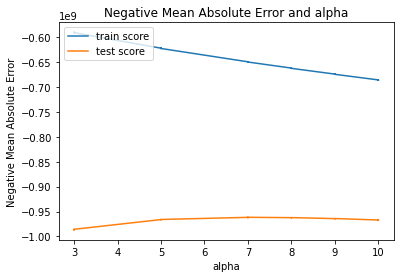

In [118]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [132]:
ridge = Ridge(alpha=7, solver='saga', random_state=42)
ridge.fit(X_train, y_train)
train_final_pred = ridge.predict(X_train)
valid_final_pred = ridge.predict(X_valid)
print('Mean Squared Error : ',np.sqrt(mean_squared_error(y_train, train_final_pred)))
print('R2 Score : ',r2_score(y_train, train_final_pred))
print('Mean Squared Error : ',np.sqrt(mean_squared_error(y_valid, valid_final_pred)))
print('R2 Score : ',r2_score(y_valid, valid_final_pred))

Mean Squared Error :  25830.22467909145
R2 Score :  0.8886494459505494
Mean Squared Error :  35685.07169205487
R2 Score :  0.8606244342483131


In [135]:
test_final_ridge = ridge.predict(test_X)
out_df = pd.concat([test_Id, pd.DataFrame(test_final_ridge)], axis=1)
out_df.columns = ['Id','SalePrice']
out_df.to_csv('ridge.csv', index=False) # Score 0.14612. Board position 2534 

### Lasso Regression

In [136]:
from sklearn.linear_model import Lasso

In [144]:
lasso = Lasso(tol=0.001, max_iter=100)
parameters = {'alpha': range(130, 160)}
lasso_regressor = GridSearchCV(estimator = lasso, 
                               param_grid = parameters,
                               scoring = 'neg_mean_squared_error', 
                               cv=5,
                               return_train_score=True,
                               verbose = 1)
lasso_regressor.fit(X_train, y_train)

print('Best Parameter : ', lasso_regressor.best_params_)
print('Best score : ', lasso_regressor.best_score_)

train_pred_lasso = lasso_regressor.predict(X_train)
print('Mean Squared Error : ',np.sqrt(mean_squared_error(y_train, train_pred_lasso)))
print('R2 Score : ',r2_score(y_train, train_pred_lasso))
valid_pred_lasso = lasso_regressor.predict(X_valid)
print('Mean Squared Error : ',np.sqrt(mean_squared_error(y_valid, valid_pred_lasso)))
print('R2 Score : ',r2_score(y_valid, valid_pred_lasso))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Parameter :  {'alpha': 159}
Best score :  -966684755.6283947
Mean Squared Error :  26779.27102827148
R2 Score :  0.8803167108373587
Mean Squared Error :  35052.4359903837
R2 Score :  0.8655224135678588


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.2s finished


In [145]:
test_pred_lasso = lasso_regressor.predict(test_X)
out_df = pd.concat([test_Id, pd.DataFrame(test_pred_lasso)], axis=1)
out_df.columns = ['Id','SalePrice']
out_df.to_csv('lasso.csv', index=False) # Score 0.14261. Board position 2310 

### ElasticNet

In [146]:
from sklearn.linear_model import ElasticNet

In [156]:
elastic = ElasticNet(tol=0.001, max_iter=100)
parameters = {'alpha': range(150, 170),
             'l1_ratio':[0.5,0.6,0.7,0.8,0.9, 1],
             'selection':['cyclic','random']}
elastic_regressor = GridSearchCV(estimator = elastic, 
                               param_grid = parameters,
                               scoring = 'neg_mean_squared_error', 
                               cv=5,
                               return_train_score=True,
                               verbose = 1)
elastic_regressor.fit(X_train, y_train)

print('Best Parameter : ', elastic_regressor.best_params_)
print('Best score : ', elastic_regressor.best_score_)

train_pred_elastic = elastic_regressor.predict(X_train)
print('Mean Squared Error : ',np.sqrt(mean_squared_error(y_train, train_pred_elastic)))
print('R2 Score : ',r2_score(y_train, train_pred_elastic))
valid_pred_elastic = elastic_regressor.predict(X_valid)
print('Mean Squared Error : ',np.sqrt(mean_squared_error(y_valid, valid_pred_elastic)))
print('R2 Score : ',r2_score(y_valid, valid_pred_elastic))

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Parameter :  {'alpha': 169, 'l1_ratio': 1, 'selection': 'random'}
Best score :  -963595482.2831943
Mean Squared Error :  26964.68773182786
R2 Score :  0.878653625542149
Mean Squared Error :  34950.866640729306
R2 Score :  0.8663006197875307


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    9.2s finished


In [157]:
test_pred_elastic = elastic_regressor.predict(test_X)
out_df = pd.concat([test_Id, pd.DataFrame(test_pred_elastic)], axis=1)
out_df.columns = ['Id','SalePrice']
out_df.to_csv('elasticnet.csv', index=False) # Score 0.14261. Board position 2310 

### Neural Networks

In [160]:
import tensorflow as tf

In [215]:
X_train.shape
y_train = y_train.astype(np.float)

In [227]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_shape=(X_train.shape[1],),kernel_regularizer='l1_l2'),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(1) 
])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 32)                7296      
_________________________________________________________________
dense_30 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 33        
Total params: 8,385
Trainable params: 8,385
Non-trainable params: 0
_________________________________________________________________


In [228]:
model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))

In [229]:
model.fit(X_train, y_train, validation_data=(X_valid, y_valid),epochs=1000)

Epoch 1/1000
42/42 [==============================] - 0s 5ms/step - loss: 180702.7031 - val_loss: 182852.2656
Epoch 2/1000
42/42 [==============================] - 0s 3ms/step - loss: 180648.6406 - val_loss: 182746.0312
Epoch 3/1000
42/42 [==============================] - 0s 3ms/step - loss: 180457.1562 - val_loss: 182437.1562
Epoch 4/1000
42/42 [==============================] - 0s 2ms/step - loss: 179996.2969 - val_loss: 181785.4062
Epoch 5/1000
42/42 [==============================] - 0s 2ms/step - loss: 179122.8906 - val_loss: 180647.3906
Epoch 6/1000
42/42 [==============================] - 0s 2ms/step - loss: 177695.8906 - val_loss: 178884.9844
Epoch 7/1000
42/42 [==============================] - 0s 3ms/step - loss: 175577.6094 - val_loss: 176360.7656
Epoch 8/1000
42/42 [==============================] - 0s 3ms/step - loss: 172638.7969 - val_loss: 172952.8750
Epoch 9/1000
42/42 [==============================] - 0s 3ms/step - loss: 168745.9062 - val_loss: 168535.6406
Epoch 10/1

Epoch 76/1000
42/42 [==============================] - 0s 2ms/step - loss: 27883.9453 - val_loss: 32902.2070
Epoch 77/1000
42/42 [==============================] - 0s 2ms/step - loss: 27719.8926 - val_loss: 32741.4785
Epoch 78/1000
42/42 [==============================] - 0s 2ms/step - loss: 27576.6543 - val_loss: 32612.1914
Epoch 79/1000
42/42 [==============================] - 0s 2ms/step - loss: 27440.7031 - val_loss: 32437.1230
Epoch 80/1000
42/42 [==============================] - 0s 2ms/step - loss: 27291.0801 - val_loss: 32261.2363
Epoch 81/1000
42/42 [==============================] - 0s 2ms/step - loss: 27154.3867 - val_loss: 32104.2871
Epoch 82/1000
42/42 [==============================] - 0s 2ms/step - loss: 27008.2617 - val_loss: 32004.5078
Epoch 83/1000
42/42 [==============================] - 0s 2ms/step - loss: 26899.1406 - val_loss: 31858.5957
Epoch 84/1000
42/42 [==============================] - 0s 3ms/step - loss: 26760.8867 - val_loss: 31798.8867
Epoch 85/1000
42/42

42/42 [==============================] - 0s 2ms/step - loss: 21321.9961 - val_loss: 25565.9766
Epoch 151/1000
42/42 [==============================] - 0s 2ms/step - loss: 21252.1738 - val_loss: 25611.4453
Epoch 152/1000
42/42 [==============================] - 0s 2ms/step - loss: 21194.4844 - val_loss: 25638.8594
Epoch 153/1000
42/42 [==============================] - 0s 2ms/step - loss: 21145.5332 - val_loss: 25541.9766
Epoch 154/1000
42/42 [==============================] - 0s 3ms/step - loss: 21105.9336 - val_loss: 25425.8047
Epoch 155/1000
42/42 [==============================] - 0s 2ms/step - loss: 21070.1973 - val_loss: 25319.1621
Epoch 156/1000
42/42 [==============================] - 0s 2ms/step - loss: 21010.3828 - val_loss: 25307.4512
Epoch 157/1000
42/42 [==============================] - 0s 2ms/step - loss: 20948.8516 - val_loss: 25294.3418
Epoch 158/1000
42/42 [==============================] - 0s 2ms/step - loss: 20905.1445 - val_loss: 25222.2656
Epoch 159/1000
42/42 [===

42/42 [==============================] - 0s 2ms/step - loss: 18745.4336 - val_loss: 22408.0039
Epoch 225/1000
42/42 [==============================] - 0s 2ms/step - loss: 18691.9961 - val_loss: 22314.5312
Epoch 226/1000
42/42 [==============================] - 0s 2ms/step - loss: 18665.0117 - val_loss: 22323.7422
Epoch 227/1000
42/42 [==============================] - 0s 2ms/step - loss: 18637.1035 - val_loss: 22337.6250
Epoch 228/1000
42/42 [==============================] - 0s 2ms/step - loss: 18612.2656 - val_loss: 22260.2090
Epoch 229/1000
42/42 [==============================] - 0s 2ms/step - loss: 18590.4316 - val_loss: 22187.3965
Epoch 230/1000
42/42 [==============================] - 0s 2ms/step - loss: 18556.1660 - val_loss: 22183.6113
Epoch 231/1000
42/42 [==============================] - 0s 2ms/step - loss: 18560.4141 - val_loss: 22258.4922
Epoch 232/1000
42/42 [==============================] - 0s 2ms/step - loss: 18553.9668 - val_loss: 22107.8086
Epoch 233/1000
42/42 [===

42/42 [==============================] - 0s 3ms/step - loss: 17341.8672 - val_loss: 21090.4492
Epoch 299/1000
42/42 [==============================] - 0s 2ms/step - loss: 17333.0508 - val_loss: 21027.0859
Epoch 300/1000
42/42 [==============================] - 0s 2ms/step - loss: 17328.4531 - val_loss: 21002.5762
Epoch 301/1000
42/42 [==============================] - 0s 2ms/step - loss: 17313.3340 - val_loss: 20990.7988
Epoch 302/1000
42/42 [==============================] - 0s 2ms/step - loss: 17287.5586 - val_loss: 21009.2305
Epoch 303/1000
42/42 [==============================] - 0s 2ms/step - loss: 17289.6797 - val_loss: 21015.5410
Epoch 304/1000
42/42 [==============================] - 0s 2ms/step - loss: 17281.8516 - val_loss: 20916.2656
Epoch 305/1000
42/42 [==============================] - 0s 2ms/step - loss: 17245.3184 - val_loss: 21038.4980
Epoch 306/1000
42/42 [==============================] - 0s 2ms/step - loss: 17246.8672 - val_loss: 20929.3125
Epoch 307/1000
42/42 [===

42/42 [==============================] - 0s 8ms/step - loss: 16518.8164 - val_loss: 20484.7676
Epoch 373/1000
42/42 [==============================] - 0s 2ms/step - loss: 16513.9375 - val_loss: 20404.6172
Epoch 374/1000
42/42 [==============================] - 0s 2ms/step - loss: 16519.6641 - val_loss: 20437.2988
Epoch 375/1000
42/42 [==============================] - 0s 2ms/step - loss: 16490.8105 - val_loss: 20397.5645
Epoch 376/1000
42/42 [==============================] - 0s 7ms/step - loss: 16498.9180 - val_loss: 20421.3223
Epoch 377/1000
42/42 [==============================] - 0s 10ms/step - loss: 16479.3242 - val_loss: 20373.1680
Epoch 378/1000
42/42 [==============================] - 0s 3ms/step - loss: 16493.4727 - val_loss: 20441.0352
Epoch 379/1000
42/42 [==============================] - 0s 3ms/step - loss: 16448.2422 - val_loss: 20379.7480
Epoch 380/1000
42/42 [==============================] - 0s 7ms/step - loss: 16442.9746 - val_loss: 20358.9180
Epoch 381/1000
42/42 [==

42/42 [==============================] - 0s 2ms/step - loss: 15974.1465 - val_loss: 20078.7188
Epoch 447/1000
42/42 [==============================] - 0s 2ms/step - loss: 15990.1611 - val_loss: 20043.8086
Epoch 448/1000
42/42 [==============================] - 0s 2ms/step - loss: 15967.2207 - val_loss: 20020.0742
Epoch 449/1000
42/42 [==============================] - 0s 2ms/step - loss: 15956.9727 - val_loss: 20115.1777
Epoch 450/1000
42/42 [==============================] - 0s 2ms/step - loss: 15952.5186 - val_loss: 20032.8594
Epoch 451/1000
42/42 [==============================] - 0s 3ms/step - loss: 15948.6943 - val_loss: 20042.4844
Epoch 452/1000
42/42 [==============================] - 0s 2ms/step - loss: 15946.7539 - val_loss: 20132.8594
Epoch 453/1000
42/42 [==============================] - 0s 2ms/step - loss: 15971.7852 - val_loss: 20049.2344
Epoch 454/1000
42/42 [==============================] - 0s 2ms/step - loss: 15940.1582 - val_loss: 20033.8672
Epoch 455/1000
42/42 [===

42/42 [==============================] - 0s 2ms/step - loss: 15557.8193 - val_loss: 19915.4824
Epoch 521/1000
42/42 [==============================] - 0s 2ms/step - loss: 15569.9160 - val_loss: 19940.9102
Epoch 522/1000
42/42 [==============================] - 0s 2ms/step - loss: 15573.7109 - val_loss: 19893.8203
Epoch 523/1000
42/42 [==============================] - 0s 2ms/step - loss: 15552.3516 - val_loss: 19903.2031
Epoch 524/1000
42/42 [==============================] - 0s 2ms/step - loss: 15540.0195 - val_loss: 19929.2598
Epoch 525/1000
42/42 [==============================] - 0s 2ms/step - loss: 15536.7979 - val_loss: 19955.1094
Epoch 526/1000
42/42 [==============================] - 0s 2ms/step - loss: 15550.3848 - val_loss: 19967.0801
Epoch 527/1000
42/42 [==============================] - 0s 2ms/step - loss: 15534.7061 - val_loss: 19958.5117
Epoch 528/1000
42/42 [==============================] - 0s 2ms/step - loss: 15547.6396 - val_loss: 19935.0684
Epoch 529/1000
42/42 [===

42/42 [==============================] - 0s 3ms/step - loss: 15279.3535 - val_loss: 19776.9453
Epoch 595/1000
42/42 [==============================] - 0s 3ms/step - loss: 15254.4736 - val_loss: 19799.6309
Epoch 596/1000
42/42 [==============================] - 0s 3ms/step - loss: 15266.5254 - val_loss: 19795.1465
Epoch 597/1000
42/42 [==============================] - 0s 3ms/step - loss: 15246.8428 - val_loss: 19770.1270
Epoch 598/1000
42/42 [==============================] - 0s 6ms/step - loss: 15240.7217 - val_loss: 19789.0312
Epoch 599/1000
42/42 [==============================] - 0s 4ms/step - loss: 15246.6680 - val_loss: 19809.5391
Epoch 600/1000
42/42 [==============================] - 0s 4ms/step - loss: 15242.3408 - val_loss: 19746.5371
Epoch 601/1000
42/42 [==============================] - 0s 3ms/step - loss: 15224.0518 - val_loss: 19752.0488
Epoch 602/1000
42/42 [==============================] - 0s 3ms/step - loss: 15246.0361 - val_loss: 19754.9746
Epoch 603/1000
42/42 [===

42/42 [==============================] - 0s 2ms/step - loss: 15007.1875 - val_loss: 19617.1465
Epoch 669/1000
42/42 [==============================] - 0s 2ms/step - loss: 15048.1875 - val_loss: 19586.9688
Epoch 670/1000
42/42 [==============================] - 0s 2ms/step - loss: 15006.6602 - val_loss: 19590.2773
Epoch 671/1000
42/42 [==============================] - 0s 1ms/step - loss: 15004.1309 - val_loss: 19583.2363
Epoch 672/1000
42/42 [==============================] - 0s 1ms/step - loss: 15009.0225 - val_loss: 19589.0918
Epoch 673/1000
42/42 [==============================] - 0s 1ms/step - loss: 14996.8418 - val_loss: 19566.0352
Epoch 674/1000
42/42 [==============================] - 0s 1ms/step - loss: 14981.7031 - val_loss: 19569.7363
Epoch 675/1000
42/42 [==============================] - 0s 1ms/step - loss: 14991.1709 - val_loss: 19565.1934
Epoch 676/1000
42/42 [==============================] - 0s 1ms/step - loss: 15016.3291 - val_loss: 19564.4277
Epoch 677/1000
42/42 [===

42/42 [==============================] - 0s 1ms/step - loss: 14788.2998 - val_loss: 19466.9238
Epoch 743/1000
42/42 [==============================] - 0s 2ms/step - loss: 14795.2207 - val_loss: 19459.0957
Epoch 744/1000
42/42 [==============================] - 0s 1ms/step - loss: 14794.3291 - val_loss: 19461.7910
Epoch 745/1000
42/42 [==============================] - 0s 1ms/step - loss: 14785.9463 - val_loss: 19459.8203
Epoch 746/1000
42/42 [==============================] - 0s 1ms/step - loss: 14784.1504 - val_loss: 19445.7734
Epoch 747/1000
42/42 [==============================] - 0s 1ms/step - loss: 14798.9951 - val_loss: 19460.1016
Epoch 748/1000
42/42 [==============================] - 0s 1ms/step - loss: 14775.1201 - val_loss: 19457.6230
Epoch 749/1000
42/42 [==============================] - 0s 1ms/step - loss: 14784.4053 - val_loss: 19447.5488
Epoch 750/1000
42/42 [==============================] - 0s 1ms/step - loss: 14768.0947 - val_loss: 19447.7734
Epoch 751/1000
42/42 [===

42/42 [==============================] - 0s 1ms/step - loss: 14620.6914 - val_loss: 19335.1152
Epoch 817/1000
42/42 [==============================] - 0s 1ms/step - loss: 14651.9922 - val_loss: 19344.5918
Epoch 818/1000
42/42 [==============================] - 0s 1ms/step - loss: 14607.3516 - val_loss: 19336.4727
Epoch 819/1000
42/42 [==============================] - 0s 1ms/step - loss: 14610.2617 - val_loss: 19321.4238
Epoch 820/1000
42/42 [==============================] - 0s 1ms/step - loss: 14609.7246 - val_loss: 19314.4375
Epoch 821/1000
42/42 [==============================] - 0s 1ms/step - loss: 14608.2773 - val_loss: 19327.7539
Epoch 822/1000
42/42 [==============================] - 0s 1ms/step - loss: 14608.9531 - val_loss: 19297.9512
Epoch 823/1000
42/42 [==============================] - 0s 1ms/step - loss: 14622.7568 - val_loss: 19310.8945
Epoch 824/1000
42/42 [==============================] - 0s 1ms/step - loss: 14612.7246 - val_loss: 19294.6953
Epoch 825/1000
42/42 [===

42/42 [==============================] - 0s 1ms/step - loss: 14455.7256 - val_loss: 19153.8984
Epoch 891/1000
42/42 [==============================] - 0s 1ms/step - loss: 14459.4297 - val_loss: 19156.0137
Epoch 892/1000
42/42 [==============================] - 0s 1ms/step - loss: 14437.6025 - val_loss: 19136.2832
Epoch 893/1000
42/42 [==============================] - 0s 1ms/step - loss: 14448.4111 - val_loss: 19151.1211
Epoch 894/1000
42/42 [==============================] - 0s 1ms/step - loss: 14453.1494 - val_loss: 19132.4297
Epoch 895/1000
42/42 [==============================] - 0s 1ms/step - loss: 14422.9727 - val_loss: 19097.3691
Epoch 896/1000
42/42 [==============================] - 0s 1ms/step - loss: 14461.4873 - val_loss: 19117.7148
Epoch 897/1000
42/42 [==============================] - 0s 1ms/step - loss: 14425.7051 - val_loss: 19132.0312
Epoch 898/1000
42/42 [==============================] - 0s 1ms/step - loss: 14429.2510 - val_loss: 19105.5781
Epoch 899/1000
42/42 [===

42/42 [==============================] - 0s 1ms/step - loss: 14279.6875 - val_loss: 18980.8594
Epoch 965/1000
42/42 [==============================] - 0s 1ms/step - loss: 14305.3682 - val_loss: 18991.0215
Epoch 966/1000
42/42 [==============================] - 0s 1ms/step - loss: 14284.7656 - val_loss: 18983.9902
Epoch 967/1000
42/42 [==============================] - 0s 1ms/step - loss: 14265.2539 - val_loss: 18980.3398
Epoch 968/1000
42/42 [==============================] - 0s 1ms/step - loss: 14306.3730 - val_loss: 18956.2012
Epoch 969/1000
42/42 [==============================] - 0s 2ms/step - loss: 14266.2773 - val_loss: 18954.5625
Epoch 970/1000
42/42 [==============================] - 0s 1ms/step - loss: 14266.8555 - val_loss: 18951.0410
Epoch 971/1000
42/42 [==============================] - 0s 1ms/step - loss: 14279.9971 - val_loss: 18912.0605
Epoch 972/1000
42/42 [==============================] - 0s 2ms/step - loss: 14285.3848 - val_loss: 18944.8379
Epoch 973/1000
42/42 [===

In [230]:
nn_train_pred = model.predict(X_train)
print('Mean Squared Error : ',np.sqrt(mean_squared_error(y_train, nn_train_pred)))
print('R2 Score : ',r2_score(y_train, nn_train_pred))
nn_valid_pred = model.predict(X_valid)
print('Mean Squared Error : ',np.sqrt(mean_squared_error(y_valid, nn_valid_pred)))
print('R2 Score : ',r2_score(y_valid, nn_valid_pred))

Mean Squared Error :  27460.865660247266
R2 Score :  0.8741467422721755
Mean Squared Error :  34325.519579463486
R2 Score :  0.8710421643236119


In [231]:
nn_test_pred = model.predict(test_X)
out_df = pd.concat([test_Id, pd.DataFrame(nn_test_pred)], axis=1)
out_df.columns = ['Id','SalePrice']
out_df.to_csv('nn.csv', index=False) # Score 0.14261. Board position 2310

### Bayesian Ridge

In [221]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import BayesianRidge

In [225]:
bridge = BayesianRidge()
parameters = {'alpha_1': [ 1e-9,1e-8,1e-7,1e-6],
             'alpha_2': [ 1e-2,1e-1,1,5,10],
             'lambda_1': [ 1e-3,1e-2,1e-1,1],
             'lambda_2': [ 1e-2,1e-1,1,5,10]}
bridge_regressor = GridSearchCV(estimator = bridge, 
                               param_grid = parameters,
                               scoring = 'neg_mean_squared_error', 
                               cv=5,
                               return_train_score=True,
                               verbose = 1)
bridge_regressor.fit(X_train, y_train)

print('Best Parameter : ', bridge_regressor.best_params_)
print('Best score : ', bridge_regressor.best_score_)

train_pred_ridge = bridge_regressor.predict(X_train)
print('Mean Squared Error : ',np.sqrt(mean_squared_error(y_train, train_pred_ridge)))
print('R2 Score : ',r2_score(y_train, train_pred_ridge))

valid_pred_ridge = bridge_regressor.predict(X_valid)
print('Mean Squared Error : ',np.sqrt(mean_squared_error(y_valid, valid_pred_ridge)))
print('R2 Score : ',r2_score(y_valid, valid_pred_ridge))

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Parameter :  {'alpha_1': 1e-09, 'alpha_2': 10, 'lambda_1': 0.01, 'lambda_2': 1}
Best score :  -1035587423.0873337
Mean Squared Error :  24730.432628045015
R2 Score :  0.8979296879711491
Mean Squared Error :  33799.44497321145
R2 Score :  0.8749647020042237


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:  2.6min finished


In [226]:
bridge_test_pred = bridge_regressor.predict(test_X)
out_df = pd.concat([test_Id, pd.DataFrame(bridge_test_pred)], axis=1)
out_df.columns = ['Id','SalePrice']
out_df.to_csv('bayesian.csv', index=False) # Score 0.14261. Board position 2310